In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
emotions1=["Happy","Sad","Amused","Tender","Angry","Scared","Disgusted","Neutral"]

In [4]:
emotions=["Happy","Sad","Amused","Tender","Angry","Scared","Disgusted"]


In [5]:
for emotion in emotions:
        print(emotion)
        d = {name: pd.DataFrame() for name in emotions}
        path2=f"U:\\Semester 7\\Capstone\\Emotions\\Extracted {emotion}\\"
        #print(path2)
        for root, dirs, files in os.walk(path2):
#             df1 = pd.Dataframe
            for filename in files:
#                 print(filename)
                df2=pd.read_csv(path2+filename,sep=',', skip_blank_lines=True)
#                 print(np.array(df2).shape)
                d[emotion] = pd.concat([d[emotion], df2])
            print(np.array(d[emotion]).shape)
    

Happy
(1763, 39)
Sad
(1991, 39)
Amused
(2022, 39)
Tender
(1662, 39)
Angry
(2448, 39)
Scared
(884, 39)
Disgusted
(1674, 39)


In [6]:
for emotion in emotions:
        print(emotion)
        d = {name: pd.DataFrame() for name in emotions}
        path2=f"U:\\Semester 7\\Capstone\\Emotions\\Extracted {emotion}\\"
        #print(path2)
        for root, dirs, files in os.walk(path2):
#             df1 = pd.Dataframe
            for filename in files:
#                 print(filename)
                df2=pd.read_csv(path2+filename,sep=',', skip_blank_lines=True, header=0, index_col=0)
#                 print(np.array(df2).shape)
                d[emotion] = pd.concat([d[emotion], df2])
            
        export_file_path = "U:\\Semester 7\\Capstone\\Emotions\\Finalcsvs\\"
        csvfilename=f"{emotion}.csv"
        print(export_file_path+csvfilename)
        newpath=export_file_path+csvfilename
        print(np.array(d[emotion]).shape)
        d[emotion]=d[emotion].iloc[:,:-1].dropna()
        print(np.array(d[emotion]).shape)
        d[emotion].to_csv(newpath, index = None, header=True)
#         print(d[emotion].head(80))

Happy
U:\Semester 7\Capstone\Emotions\Finalcsvs\Happy.csv
(1763, 38)
(1174, 37)
Sad
U:\Semester 7\Capstone\Emotions\Finalcsvs\Sad.csv
(1991, 38)
(1338, 37)
Amused
U:\Semester 7\Capstone\Emotions\Finalcsvs\Amused.csv
(2022, 38)
(1398, 37)
Tender
U:\Semester 7\Capstone\Emotions\Finalcsvs\Tender.csv
(1662, 38)
(1115, 37)
Angry
U:\Semester 7\Capstone\Emotions\Finalcsvs\Angry.csv
(2448, 38)
(1556, 37)
Scared
U:\Semester 7\Capstone\Emotions\Finalcsvs\Scared.csv
(884, 38)
(519, 37)
Disgusted
U:\Semester 7\Capstone\Emotions\Finalcsvs\Disgusted.csv
(1674, 38)
(1007, 37)


In [7]:

data = pd.DataFrame() 
path2=f"U:\\Semester 7\\Capstone\\Emotions\\Finalcsvs\\"
#print(path2)
for root, dirs, files in os.walk(path2):
#             df1 = pd.Dataframe
    for filename in files:
        
        #print(filename)
        df2=pd.read_csv(path2+filename,sep=',', skip_blank_lines=True, header=0, index_col=0)
        df2["Emotion"]=filename[:-4]
        #print(df2.head())
#                 print(np.array(df2).shape)
        data = pd.concat([data, df2])

export_file_path = "U:\\Semester 7\\Capstone\\Emotions\\"

csvfilename="Allfeatures.csv"
# print(export_file_path+csvfilename)
newpath=export_file_path+csvfilename
# print(np.array(d[emotion]).shape)
# d[emotion]=d[emotion].iloc[:,:-1].dropna()
# print(np.array(d[emotion]).shape)
data = data.drop("Battery", axis=1)
data = data.drop("HeadBandOn", axis=1)
data = data.drop("Gyro_X", axis=1)
data = data.drop("Gyro_Y", axis=1)
data = data.drop("Gyro_Z", axis=1)
data = data.drop("HSI_TP9", axis=1)
data = data.drop("HSI_TP10", axis=1)
data = data.drop("HSI_AF7", axis=1)
data = data.drop("HSI_AF8", axis=1)
data = data.drop("AUX_RIGHT", axis=1)
data = data.drop("Accelerometer_X", axis=1)
data = data.drop("Accelerometer_Z", axis=1)
data = data.drop("Accelerometer_Y", axis=1)
data=data.sample(frac=1)
print(data.head(25))

data.to_csv(newpath, index = None, header=True)
# #         print(d[emotion].head(80))

           Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  Theta_AF8  \
Delta_TP9                                                                      
0.665354    0.000000   1.277241    0.526539   0.164385   0.000000   0.585425   
0.659748    0.000000  -0.100546    0.650298   0.755781   0.000000   0.133417   
0.599047    0.014235   0.090255    1.018149   0.454651   0.004004   0.043914   
0.615204    0.827917   0.514519    0.831166   0.411593   0.130634   0.588332   
0.768148    0.000000   0.165209    0.226677   1.052428   0.000000  -0.002932   
0.817917   -0.423496   0.373882    0.616811   0.734781  -0.194554   0.168827   
0.747527    0.882353   0.883088    0.567100   0.209435   0.733400   0.818882   
0.941504    0.000000   0.467383   -0.148660   0.692004   0.000000   0.089932   
0.985678    0.000000  -0.357675    0.449256   1.359994   0.000000  -0.227734   
0.187808    0.000000   0.021985    1.327823   0.598767   0.000000  -0.029567   
0.716192    0.811681   0.640757    0.137

In [8]:
Y = data.iloc[:,-1]
print(Y)

Delta_TP9
 0.665354       Amused
 0.659748      Neutral
 0.599047      Neutral
 0.615204      Neutral
 0.768148      Neutral
 0.817917          Sad
 0.747527      Neutral
 0.941504          Sad
 0.985678      Neutral
 0.187808        Happy
 0.716192        Angry
 0.127182          Sad
 0.612128      Neutral
 0.391146    Disgusted
 0.212194          Sad
 1.762956    Disgusted
 0.395627      Neutral
 0.737834    Disgusted
 0.985678      Neutral
 0.773402        Angry
 0.533086       Amused
 1.487042        Angry
 0.000000       Amused
 0.812336          Sad
 0.233882       Scared
 1.540362      Neutral
 0.341855        Happy
 0.022043       Amused
 0.563542      Neutral
 1.557128       Amused
               ...    
 0.131845      Neutral
 0.652651      Neutral
 0.975808      Neutral
 0.290826       Scared
 0.100529        Angry
 0.738329       Tender
 0.416494      Neutral
 0.655316          Sad
-0.064927       Amused
 0.453387          Sad
 1.054728          Sad
 1.285423      Neutral
 

In [9]:
X = data.iloc[:,:-1]
# X = X.fillna(X.mean())
# # np.where(np.isnan(X))
normalized_X = preprocessing.normalize(X)
X

,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,...,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10
Delta_TP9,,,,,,,,,,,,,,,,,,,,,
0.665354,0.000000,1.277241,0.526539,0.164385,0.000000,0.585425,0.047725,0.671950,0.000000,0.373694,...,0.182738,0.570823,0.545905,0.000000,-0.308100,0.390734,714.79850,444.432220,809.08420,772.82050
0.659748,0.000000,-0.100546,0.650298,0.755781,0.000000,0.133417,0.842865,1.144200,0.000000,0.463250,...,0.212040,0.992240,0.995333,0.000000,-0.331399,0.481351,950.91580,7.655678,797.80220,1041.17210
0.599047,0.014235,0.090255,1.018149,0.454651,0.004004,0.043914,0.619994,0.208789,0.287651,-0.074545,...,0.666601,0.805988,0.550773,0.276219,0.708858,0.412249,804.65204,805.457900,806.26373,787.32600
0.615204,0.827917,0.514519,0.831166,0.411593,0.130634,0.588332,0.325393,0.628954,0.651297,0.583297,...,0.429611,0.981444,0.211268,-0.006769,-0.123127,1.021401,814.32230,819.157530,788.53480,824.39560
0.768148,0.000000,0.165209,0.226677,1.052428,0.000000,-0.002932,0.363809,1.327728,0.000000,0.137925,...,1.100140,0.708002,0.903949,0.000000,0.305858,0.421355,811.09890,576.190500,764.35895,815.93410
0.817917,-0.423496,0.373882,0.616811,0.734781,-0.194554,0.168827,0.462274,0.832244,-0.057198,-0.082892,...,-0.033275,0.306783,0.624968,-0.466137,-0.551450,-0.231680,816.33700,801.428600,803.04030,794.57874
0.747527,0.882353,0.883088,0.567100,0.209435,0.733400,0.818882,0.539240,0.574187,0.428772,0.922804,...,-0.008727,0.733526,0.835312,-0.646458,-0.484829,0.792905,776.84980,808.681340,804.24910,798.20514
0.941504,0.000000,0.467383,-0.148660,0.692004,0.000000,0.089932,-0.018169,0.945774,0.000000,0.322353,...,0.872978,0.428922,0.152922,0.000000,0.355486,0.342849,803.84610,1035.128200,653.55310,801.42860
0.985678,0.000000,-0.357675,0.449256,1.359994,0.000000,-0.227734,0.349199,1.270711,0.000000,-0.023407,...,0.027498,0.452106,0.464090,0.000000,-0.423793,0.490158,689.01100,539.523800,787.72894,679.74360


[ 0.0426683   0.03741844  0.04187905  0.04491118  0.04024253  0.03473088
  0.04232959  0.04339024  0.04743916  0.03885253  0.04136512  0.05302882
  0.0536336   0.04906262  0.04519578  0.0577912   0.05708019  0.05299933
  0.05876146  0.02714523  0.0336435   0.0296807   0.02675056]


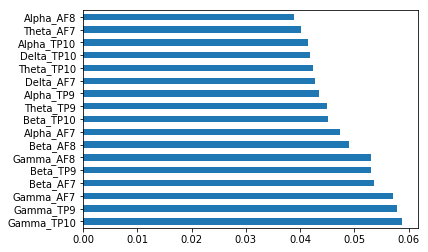

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler  



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)









scaler = StandardScaler()  
scaler.fit(X)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

print(X_train)

[[ 1.01514225  0.70044187  0.81117583 ..., -0.15705703 -0.10760116
   0.25869039]
 [ 1.29667705  1.57420361  0.07224475 ..., -0.11845448 -0.39273209
   0.22843364]
 [ 0.06463678  0.34483206  0.694829   ..., -0.12396916 -0.13501742
   0.32676643]
 ..., 
 [-0.01514806  1.31342828  1.00603943 ...,  3.71238368 -0.88622792
  -0.39181893]
 [-0.90194027  0.03885285  0.37471231 ..., -0.0173528  -0.07470121
  -0.04765416]
 [-0.81659901 -1.83405601 -0.39687549 ...,  1.83740489 -0.04728467
   0.30785678]]


In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1, warm_start=True)
print(clf.fit(X_train, y_train))  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True)


In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.349220103986


In [ ]:
from sklearn.model_selection import GridSearchCV 

mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)



In [ ]:
print('Best parameters found:\n', clf.best_params_)

print("All other results are below")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

from sklearn.metrics import classification_report
y_true, y_pred =y_test , clf.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))